## SVM

Here we have trained an SVM with **Linear** kernel as per the performance it gave at default settings in comparison to other kernels. 

In [40]:
import numpy as np
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.svm import SVC

In [104]:
x_data = np.load("x.npy")
y_data = np.load("y.npy")

In [105]:
from sklearn.model_selection import StratifiedShuffleSplit

In [106]:
import matplotlib.pyplot as plt

In [107]:
sss = StratifiedShuffleSplit(test_size=0.2)

In [108]:
for train_ix, test_ix in sss.split(x_data, y_data):
    x_train, x_test = x_data[train_ix], x_data[test_ix]
    y_train, y_test = y_data[train_ix], y_data[test_ix]

In [109]:
x_train.shape, x_test.shape

((80, 16), (21, 16))

In [86]:
classifier = SVC(kernel="linear", probability=True, C=1)

In [87]:
classifier.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [88]:
def performance(model, x, y):
    return np.mean(y == model.predict(x))

Here we have calculated the Testing accuracy of the trained SVM classifier.

In [89]:
performance(classifier, x_test, y_test)

0.95238095238095233

Here we have calculated the Training accuracy of the trained SVM classifier.

In [90]:
performance(classifier, x_train, y_train)

1.0

Its clear here that, the model is overfitted on the data, but, due to less number of instances in the testing dataset the accuracy is around 95%. But since the dataset was shuffled and stratifically splitted, we can consider the model as having a pretty good performance at default settings. To have a better estimate of the performance, lets plot pr-curve.

In [91]:
def plot_prcurve(model, x, y, show=0):
    proba = model.predict_proba(x)
    for class_ in np.unique(y):
        y_class = np.asarray(y == class_, np.int32)
        y_prob = proba[:, class_-1]
        y_pred = np.argmax(proba, axis=1) + 1
        if show>0:
            print("Class:", class_)
            if show>1:
                print("Acc:", np.mean(y_class==(y_pred == class_)))
        precision, recall, thresholds = precision_recall_curve(y_class, y_prob)
        plt.plot(recall, precision)
        plt.xlabel('recall', fontsize=18)
        plt.ylabel('precision', fontsize=16)
        if show>0:
            plt.show()

Below we have plotted precision_recall_curve of the SVM classifier.

Class: 0
Acc: 0.619047619048


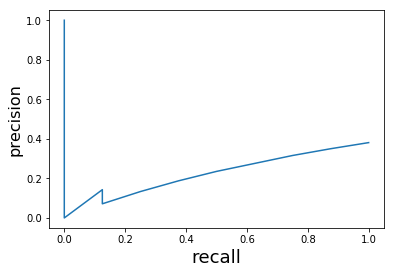

Class: 1
Acc: 0.428571428571


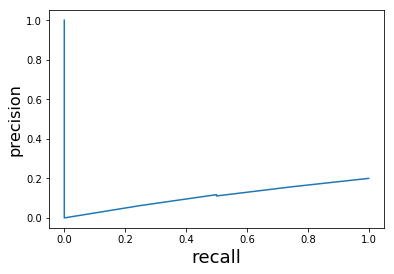

Class: 2
Acc: 0.761904761905


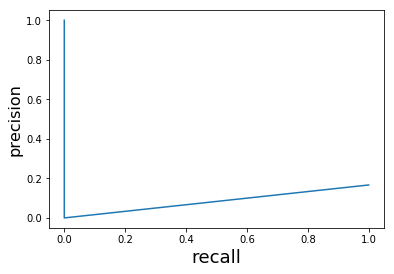

Class: 3
Acc: 0.857142857143


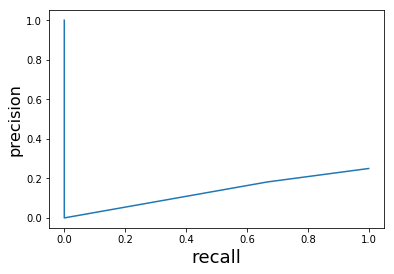

Class: 4
Acc: 0.809523809524


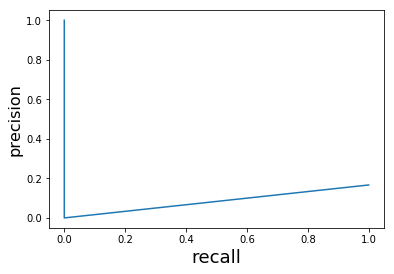

Class: 5
Acc: 0.809523809524


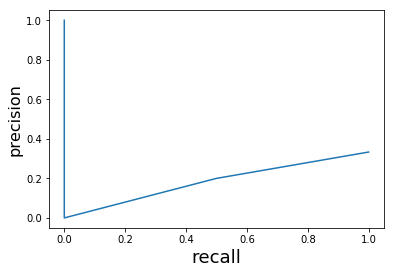

Class: 6
Acc: 0.809523809524


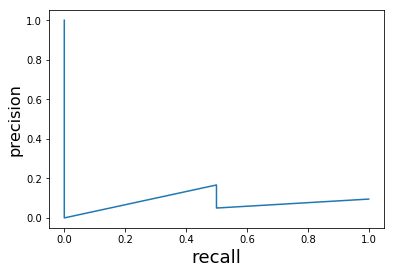

In [92]:
plot_prcurve(classifier, x_test, y_test, show=2)

Below is the combined curve of the entire multiclass distribution.

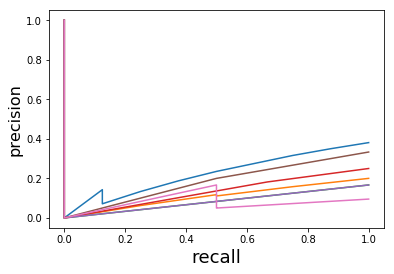

In [93]:
plot_prcurve(classifier, x_test, y_test)

## Neural Network

In [94]:
from sklearn.preprocessing import OneHotEncoder

In [95]:
import tensorflow as tf

In [110]:
y_train-=1
y_test-=1

In [111]:
tf.reset_default_graph()

In [112]:
x = tf.placeholder(shape=[None, 16], dtype=tf.float32)
y = tf.placeholder(shape=None, dtype=tf.int32)

In [113]:
logits = tf.layers.dense(inputs=x, units=7, activation=None)
loss = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)

In [114]:
output = tf.nn.softmax(logits)
predict = tf.nn.in_top_k(output, y, k=1)

In [115]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
training_op = optimizer.minimize(loss)

In [116]:
oe = OneHotEncoder(sparse=False)
y_1hot = oe.fit_transform(y_train.reshape(-1,1))

/home/nalin/.virtualenvs/tf/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [117]:
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
init.run()
for epoch in range(100):
    print("Epoch:", epoch)
    sess.run(training_op, feed_dict={x:x_train, y:y_1hot})
    train_acc = np.mean(sess.run(predict, feed_dict = {x:x_train, y:y_train}))
    test_acc = np.mean(sess.run(predict, feed_dict = {x:x_test, y:y_test}))
    print("Train loss:", train_acc)
    print("Test loss:", test_acc)

Epoch: 0
Train loss: 0.4125
Test loss: 0.380952380952
Epoch: 1
Train loss: 0.3
Test loss: 0.333333333333
Epoch: 2
Train loss: 0.4125
Test loss: 0.380952380952
Epoch: 3
Train loss: 0.625
Test loss: 0.571428571429
Epoch: 4
Train loss: 0.6875
Test loss: 0.571428571429
Epoch: 5
Train loss: 0.8625
Test loss: 0.857142857143
Epoch: 6
Train loss: 0.85
Test loss: 0.761904761905
Epoch: 7
Train loss: 0.9
Test loss: 0.857142857143
Epoch: 8
Train loss: 0.9
Test loss: 0.857142857143
Epoch: 9
Train loss: 0.9
Test loss: 0.904761904762
Epoch: 10
Train loss: 0.8875
Test loss: 0.857142857143
Epoch: 11
Train loss: 0.9
Test loss: 0.904761904762
Epoch: 12
Train loss: 0.9
Test loss: 0.904761904762
Epoch: 13
Train loss: 0.9125
Test loss: 0.904761904762
Epoch: 14
Train loss: 0.9
Test loss: 0.904761904762
Epoch: 15
Train loss: 0.925
Test loss: 0.904761904762
Epoch: 16
Train loss: 0.925
Test loss: 0.904761904762
Epoch: 17
Train loss: 0.9375
Test loss: 0.904761904762
Epoch: 18
Train loss: 0.9375
Test loss: 0.9047

This function here is just a wrapper to use function "plot_prcurve".

In [118]:
class mymodel:
    def __init__(self,model, sess):
        self.model = model
        self.sess = sess
    
    def predict_proba(self, x_):
        return self.model.eval(feed_dict={x:x_})

In [119]:
nn = mymodel(output, sess)

Class: 0
Acc: 0.619047619048


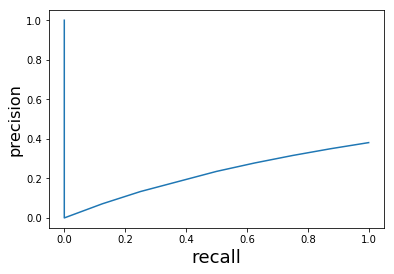

Class: 1
Acc: 0.428571428571


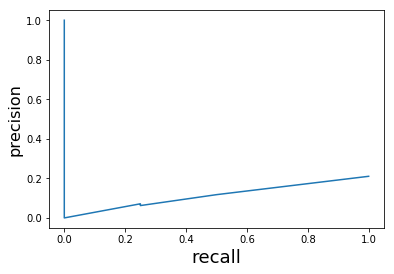

Class: 2
Acc: 0.809523809524


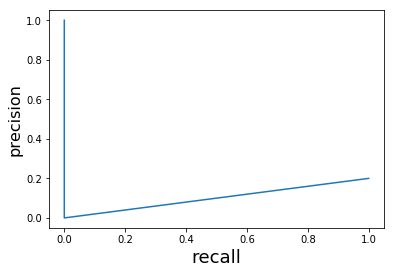

Class: 3
Acc: 0.857142857143


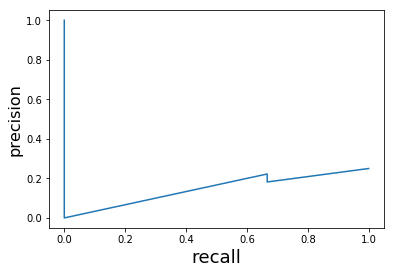

Class: 4
Acc: 0.809523809524


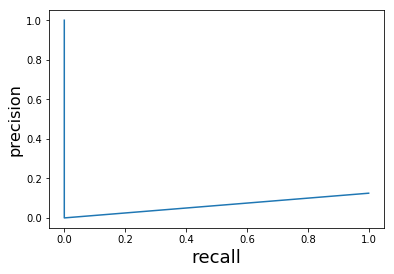

Class: 5
Acc: 0.857142857143


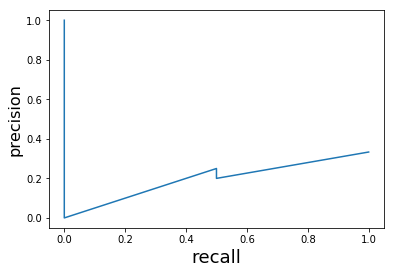

Class: 6
Acc: 0.809523809524


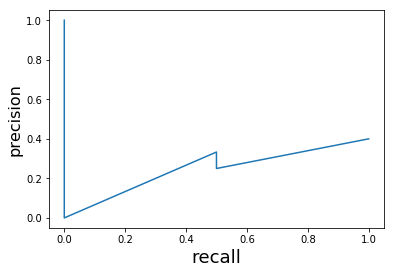

In [120]:
plot_prcurve(nn, x_test, y_test, show=2)

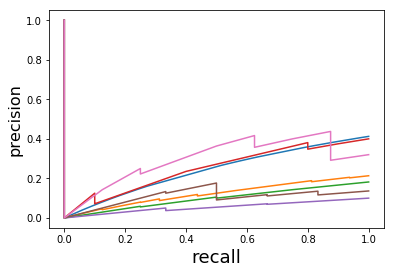

In [69]:
plot_prcurve(nn, x_train, y_train)

In [121]:
sess.close()

### SVM vs NN

Although the training as well as testing accuracy are similar in both the models. It is due to fact that, the SVMs are trained using "ovr" (one vs rest strategy), i.e, the algorithm trains itself by training "no_of_classes"(7 here) binary models and then combining its result for prediction. 
The NN is also trained using the same strategy but, instead of explicitly training 7 binary classifiers, we have used softmax which implicitly does the same as we have not used any hidden layer units.

Under constrained or regularized environment, the SVM might be able to perform well. But considering the fact that the trained NN has high precision and recall than the SVM at corresponding thresholds, we can conclude that, SVMs perform better iff hidden units with non-linear activation is included in the NN model or both will perform similar if NN has no non-linearity/non-linear hidden units.